In [1]:
!pip install yfinance
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.autolayout'] = True
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True
plt.style.use('fivethirtyeight')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
yf_prices = yf.download(['AAPL'], start='2012-01-01')

[*********************100%***********************]  1 of 1 completed


# 1. Stationarity

In [4]:
prices = yf_prices['Adj Close']

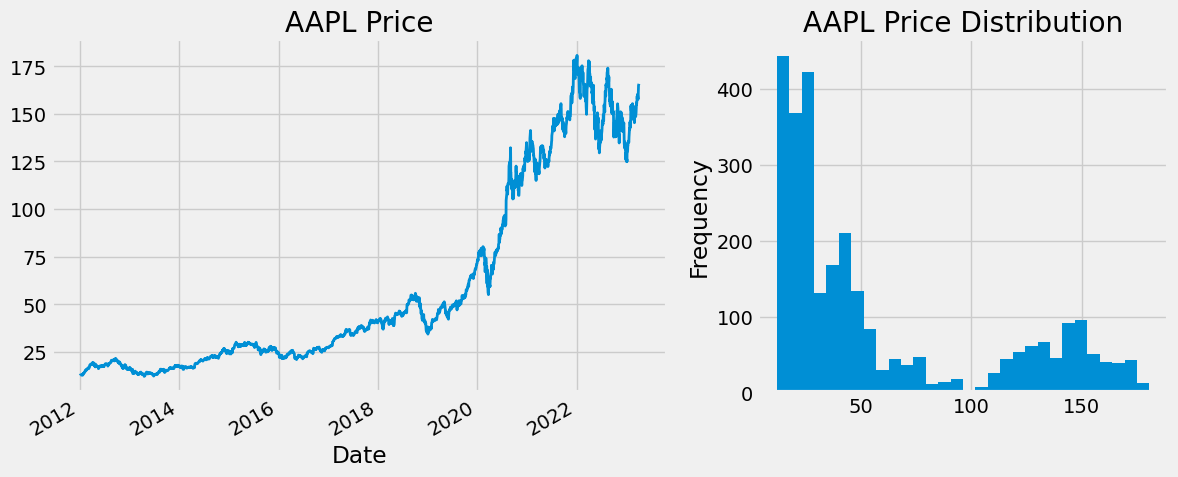

In [5]:
subplots_ratio = dict(width_ratios=[3,2], height_ratios=[1])
fig, ax = plt.subplots(1,2, gridspec_kw=subplots_ratio, figsize=(12,5))
prices.plot(title='AAPL Price', ax=ax[0], grid=True, linewidth=2)
prices.plot.hist(title='AAPL Price Distribution', ax=ax[1], grid=True, bins=30)
plt.tight_layout()
plt.savefig('tmp.png')

# 2. Log Returns

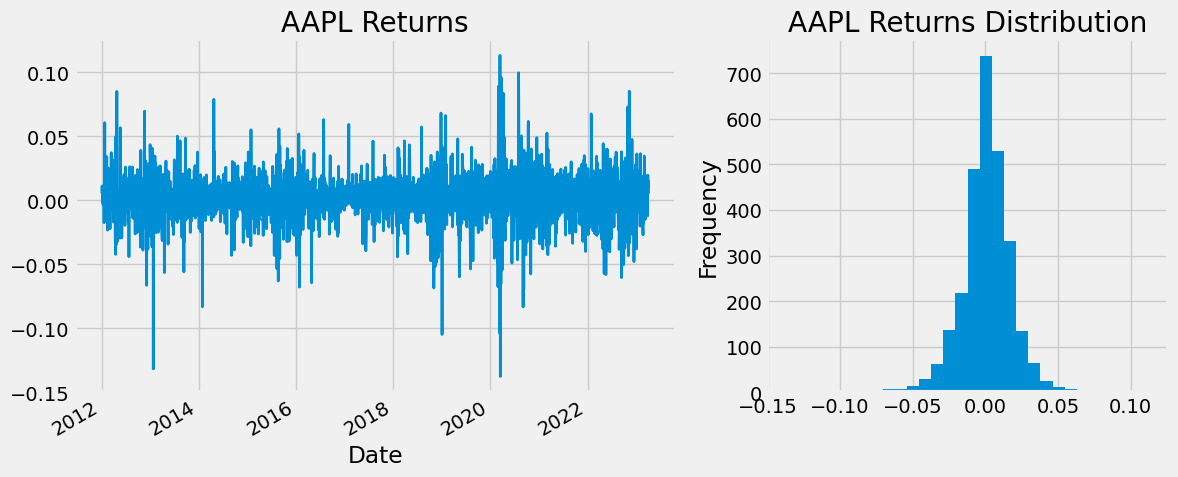

In [6]:
rs = prices.apply(np.log).diff(1)

subplots_ratio = dict(width_ratios=[3,2], height_ratios=[1])
fig, ax = plt.subplots(1,2, gridspec_kw=subplots_ratio, figsize=(12,5))
rs.plot(title='AAPL Returns', ax=ax[0], grid=True, linewidth=2)
rs.plot.hist(title='AAPL Returns Distribution', ax=ax[1], grid=True, bins=30)
plt.tight_layout()
plt.savefig('tmp.png')

# 3. Rolling Statistics

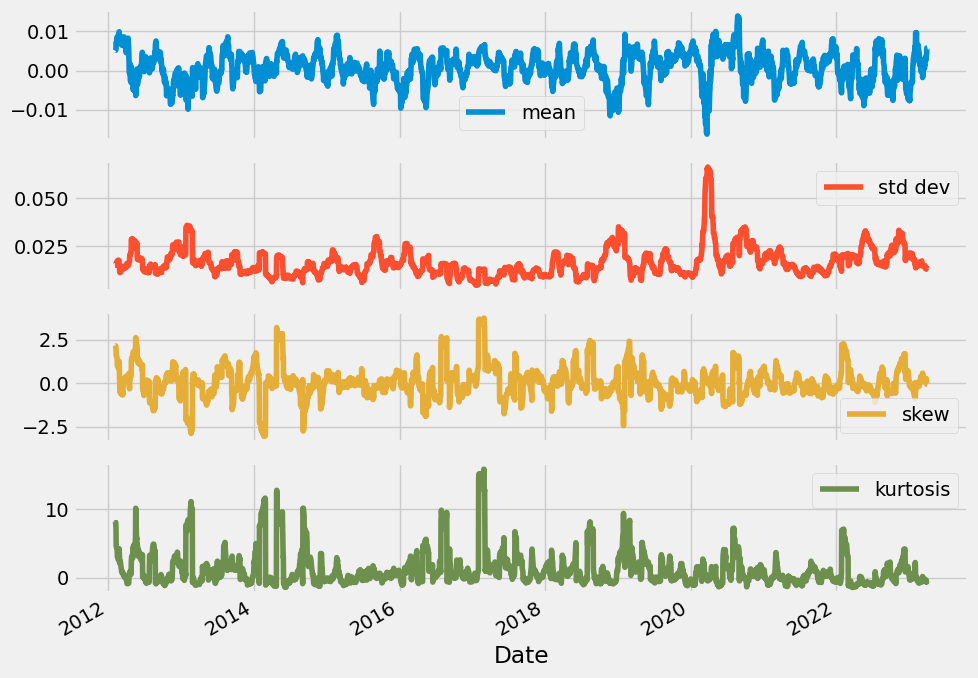

In [7]:
w = 22
s1 = rs.rolling(w).mean()
s2 = rs.rolling(w).std()
s3 = rs.rolling(w).skew()
s4 = rs.rolling(w).kurt()

signals = pd.concat([s1, s2, s3, s4], axis=1)
signals.columns = ['mean', 'std dev', 'skew', 'kurtosis']
signals.plot(subplots=True, figsize=(10,7));
plt.tight_layout()
plt.savefig('tmp.png')

# 3. Volatility Clustering

In [8]:
yf_prices = yf.download(['AAPL'], start='2012-01-01')

[*********************100%***********************]  1 of 1 completed


In [9]:
prices = yf_prices['Adj Close']
rs = prices.apply(np.log).diff(1)

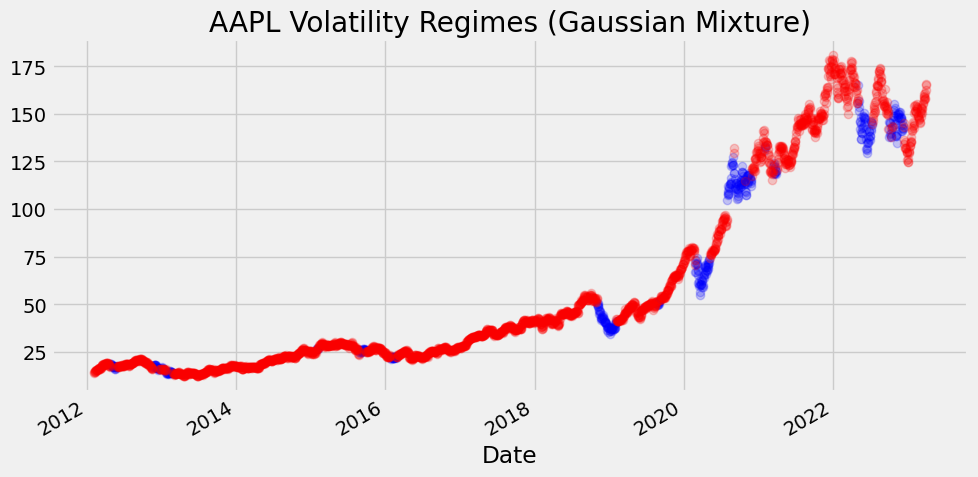

In [11]:
from sklearn.mixture import GaussianMixture

w = 22
vol = rs.rolling(w).std()
vol = vol.dropna()

labels = GaussianMixture(2).fit_predict(vol.values.reshape(-1,1))

prices = prices.reindex(vol.index)
prices[labels==0].plot(style='bo', alpha=0.2)
prices[labels==1].plot(style='ro', alpha=0.2)
plt.title('AAPL Volatility Regimes (Gaussian Mixture)')
plt.tight_layout()
plt.savefig('tmp.png')